#                         Housing Prices Prediction system

# 1. Libraries used

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


# 2. Dataset description
California Housing Prices dataset from the StatLib repos‐itory2
This dataset was based on data from the 1990 California cen‐
sus.
The first task you are asked to
perform is to build a model of housing prices in California using the California cen‐
sus data. This data has metrics such as the population, median income, median hous‐
ing price, and so on for each block group in California. Block groups are the smallest
geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3,000 people). We will just call them “dis‐
tricts” for short.
Your model should learn from this data and be able to predict the median housing
price in any district, given all the other metrics.

# 3. Load Dataset

In [2]:
df = pd.read_csv('housing.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()
#to check atrribute type -----all numerical atrri except one categorical atrrib
#null values
#nan values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Each row represents one district. There are 10 attributes (you can see the first 6 in the
screenshot): longitude, latitude, housing_median_age, total_rooms, total_bed
rooms, population, households, median_income, median_house_value, and
ocean_proximity.


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#only categorical attribute
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


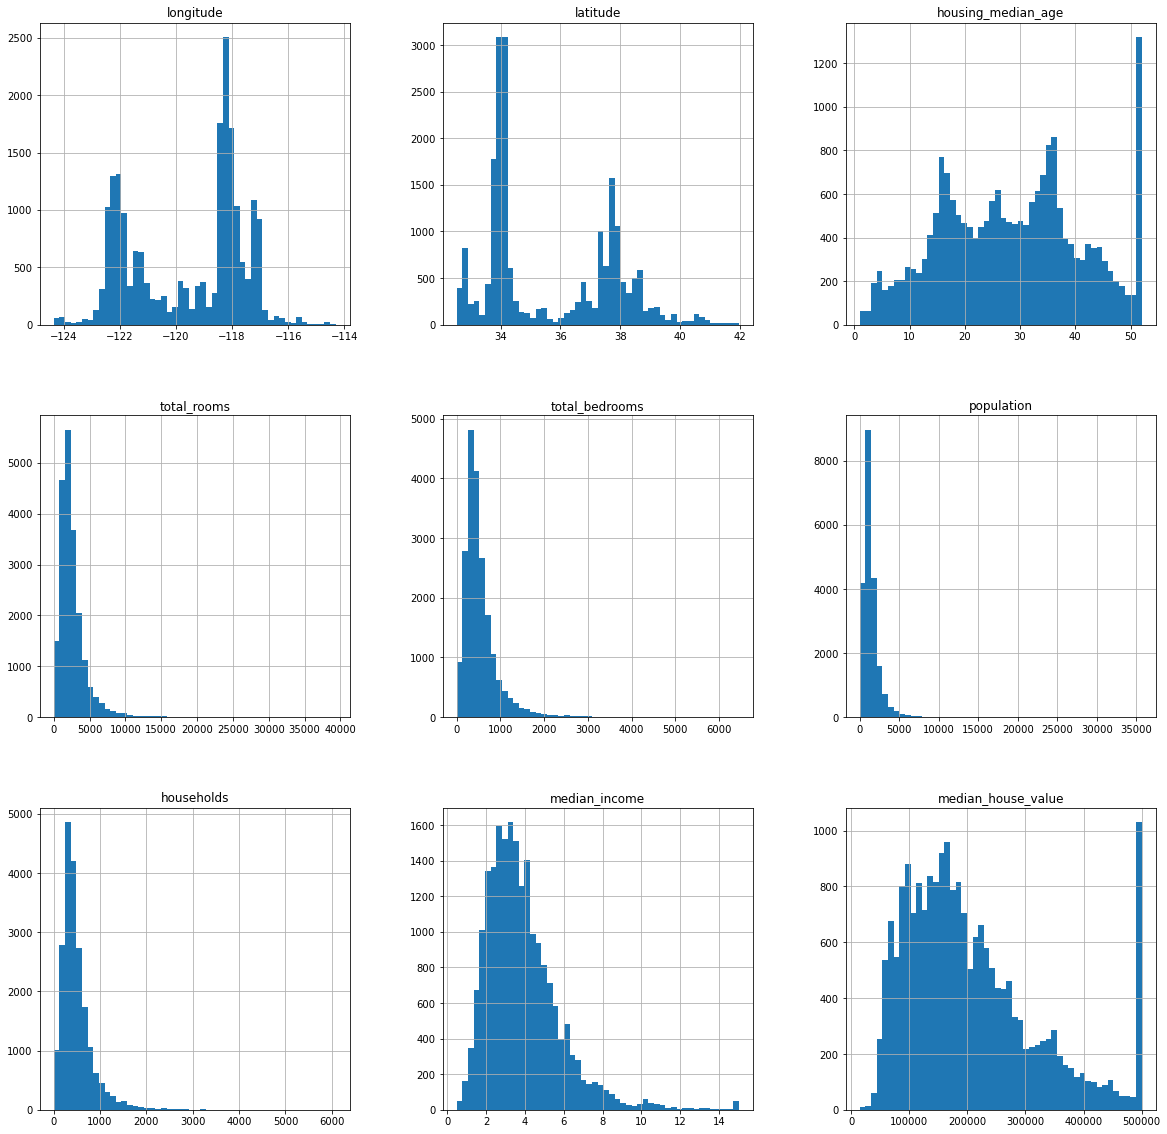

In [8]:
df.hist(bins=50, figsize=(20,20))
plt.show()

1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000). Working with preprocessed attributes is common in Machine Learning
and it is not necessarily a problem, but you should try to understand how the
data was computed.

2. The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond $500,000, then you have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).

3. These attributes have very different scales. We will discuss this later in this chap‐
ter when we explore feature scaling.
4. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.


# 3.  stratuified samplin and random samplin comparision

<AxesSubplot:ylabel='Frequency'>

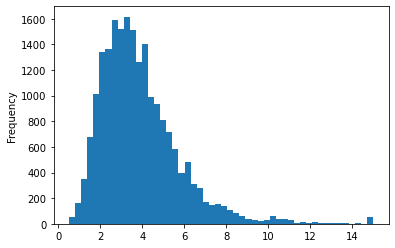

In [9]:
#stratified sampling based on median income need equal distribution of income

df.median_income.plot(kind = 'hist', bins = 50)


In [10]:
df.median_income.describe(percentiles=[.1,.2,.25,.5,.75,.8,.85,.9,.95])

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
10%          1.903800
20%          2.352300
25%          2.563400
50%          3.534800
75%          4.743250
80%          5.109720
85%          5.542915
90%          6.159210
95%          7.300305
max         15.000100
Name: median_income, dtype: float64

In [11]:
#we need equal rep as we see that 85% of the income is below 6 and only15% is bw 6-15
6/4

1.5

In [12]:
#new colum of bins
bins = [0. ,1.5 ,3. ,4.5 ,6.,np.inf ]
df['income_cat'] = pd.cut(df['median_income'],bins,  labels=[1,2,3,4,5])

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

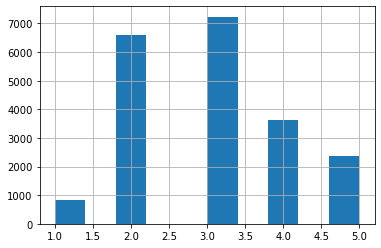

In [14]:
df.income_cat.hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for i,j in split.split(df, df['income_cat']):
    str_train_df = df.loc[i]
    str_test_df =  df.loc[j]
    

In [16]:
#check income category proportions in train
str_train_df.income_cat.value_counts()/len(str_train_df)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [17]:
#comp 
#random sampling
train_df, test_df = train_test_split(df,test_size=0.2,random_state=10)

In [18]:
train_df.income_cat.value_counts()/len(train_df)

3    0.349625
2    0.320918
4    0.176114
5    0.113614
1    0.039729
Name: income_cat, dtype: float64

In [19]:
df.income_cat.value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
#remove the income_cat attribute
for i in (str_train_df, str_test_df):
    i.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

1. you are only exploring the training set now.
2. if the training set is very large, you may want to sample an explorationset, to make manipulations easy and fast.

In [21]:
#make copy of trainset
df = str_train_df.copy()

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

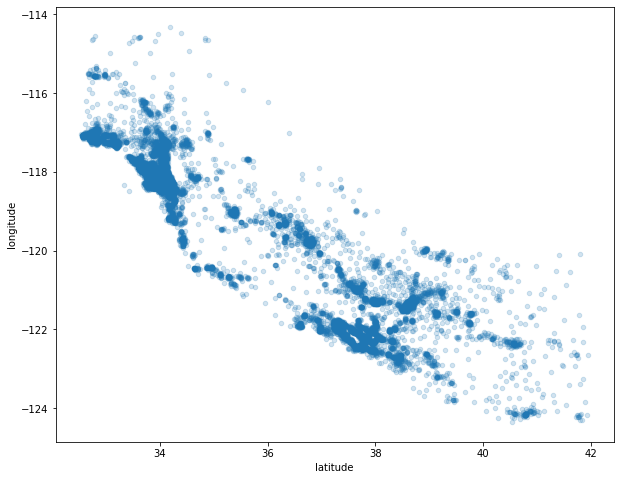

In [23]:
#geographical information (latitude and longitude), it is a good idea tocreate a scatterplot 

df.plot(kind = 'scatter', x ='latitude', y ='longitude', figsize =(10, 8), alpha = 0.2 )

#alpha option to 0.1 makes it much easier to visualize the placesn where there is a high density of data points

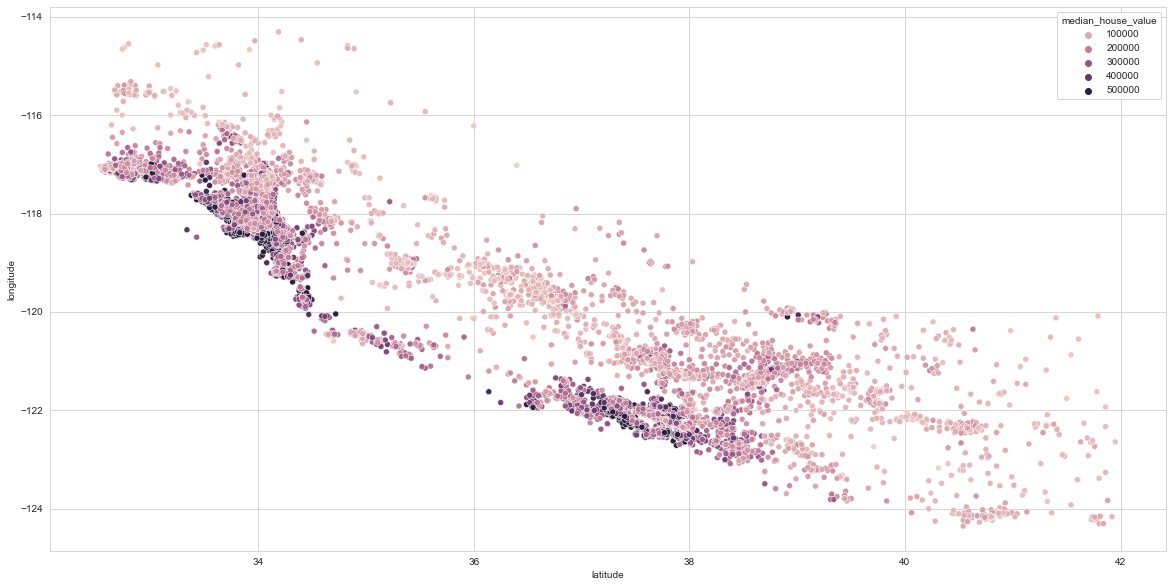

In [24]:
plt.figure(figsize =(20,10))
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.scatterplot(x ='latitude', y ='longitude', data = df,  sizes=(20, 20), hue = 'median_house_value')
plt.show()

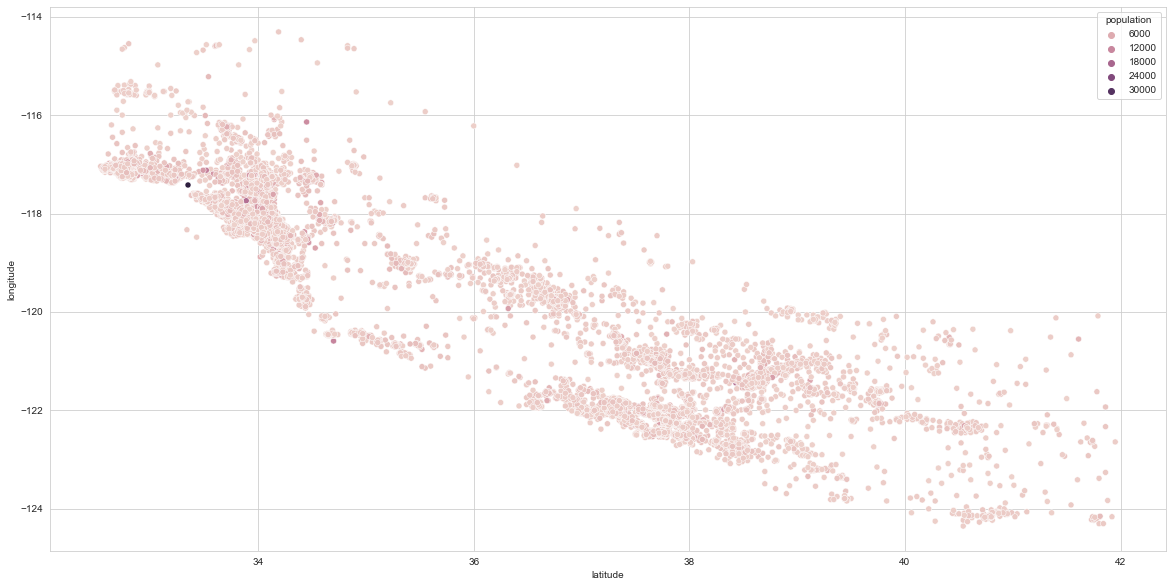

In [25]:
plt.figure(figsize =(20,10))
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.scatterplot(x ='latitude', y ='longitude', data = df ,sizes=(10, 6), hue = 'population')
plt.show()

housing prices are very much related to the location
(e.g., close to the ocean) and to the population density,

In [26]:
#correaltion

a = df.corr()['median_house_value'].sort_values(ascending =False)[1:]
correlation = pd.DataFrame(a)
correlation

,median_house_value
median_income,0.687160
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population,-0.026920
longitude,-0.047432
latitude,-0.142724


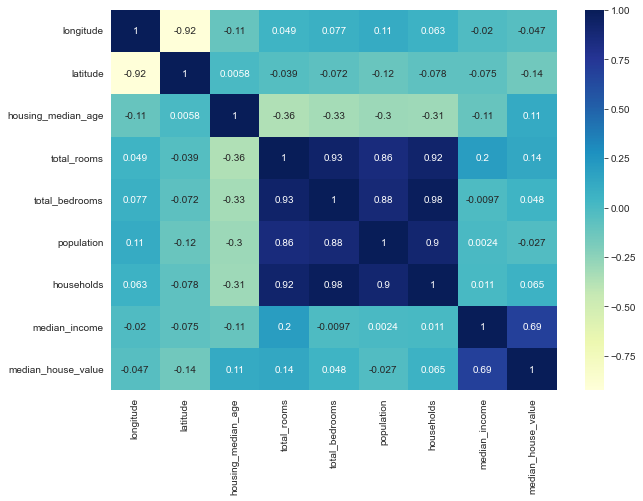

In [27]:
plt.figure(figsize =(10,7))
sns.heatmap(df.corr(), annot =True,cmap="YlGnBu")
plt.show()

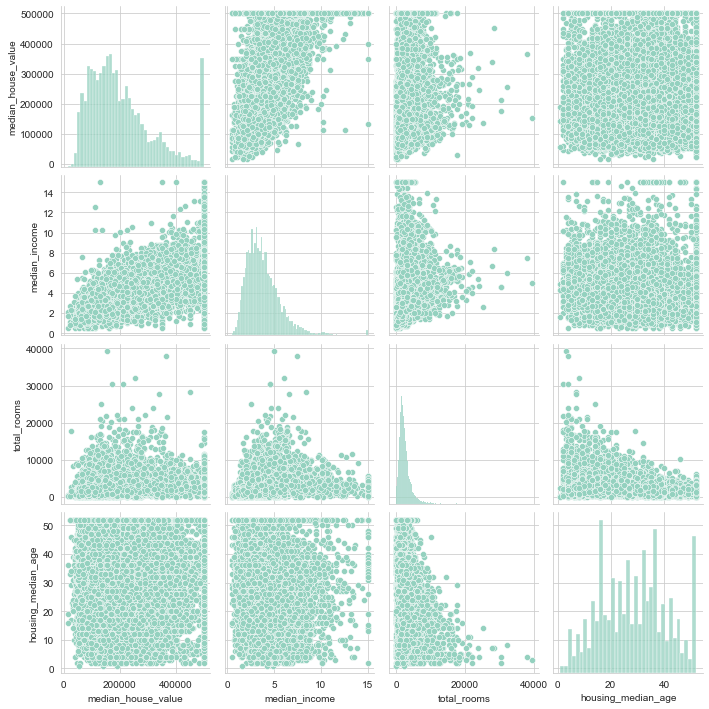

In [28]:
x = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
sns.pairplot(df[x])

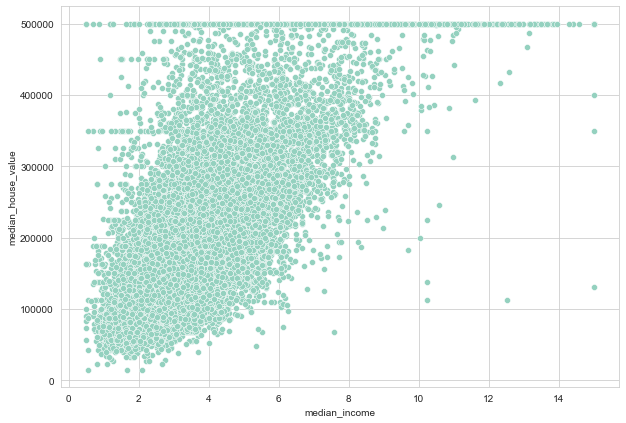

In [29]:
#most promising attribute to predict the median house value is the median income
plt.figure(figsize=(10,7))
sns.scatterplot( x="median_income", y="median_house_value",data =df)
plt.show()

the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000. 
But this plot reveals other less obvious straight lines: a horizontal line around $450,000,
another around $350,000, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

<AxesSubplot:ylabel='Frequency'>

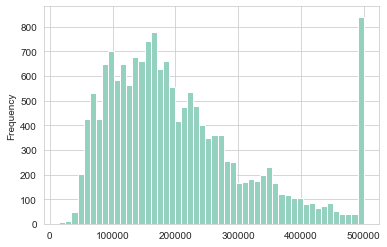

In [30]:
df.median_house_value.plot(kind = 'hist', bins =50)

[]

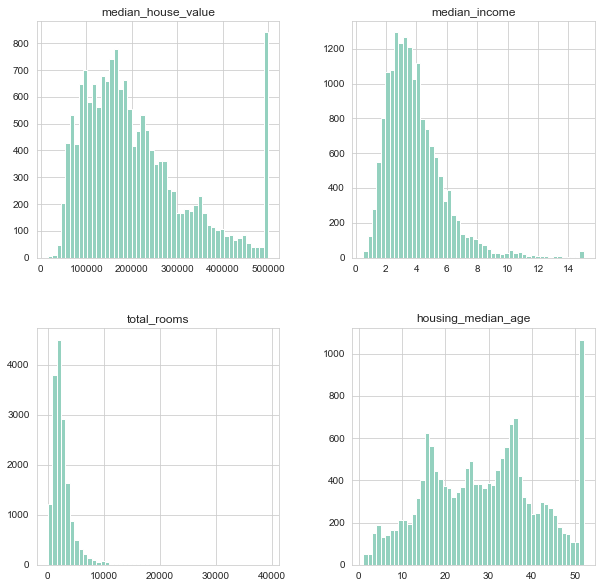

In [31]:

df[x].hist(figsize =(10,10), bins =50)
plt.plot()

CONCLUSION
1. You identified a few data quirks that you may want to clean up before feeding the data to a Machine Learning algorithm, and

2. you found interesting correlations between attributes, in particular with the target attribute. 

3. noticed that some attributes have a tail-heavy distribution, so you may want to trans‐ form them (e.g., by computing their logarithm). 
4. there are some outliers also present

# Experimenting with Attribute Combinations


In [32]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN


In [33]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [34]:
b = df.corr()['median_house_value'].sort_values(ascending =False)[1:]
correlation2 = pd.DataFrame(b)
correlation2

,median_house_value
median_income,0.687160
rooms_per_household,0.146285
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population_per_household,-0.021985
population,-0.026920
longitude,-0.047432
latitude,-0.142724


The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms.

# Prepare the Data for Machine Learning Algorithms

 first let’s revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values

In [35]:
X_df = str_train_df.drop('median_house_value', axis =1)
y_df = str_train_df['median_house_value'].copy()

##Data Cleaning


In [177]:
X_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [36]:
#handling missing values
X_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

You have three options:
    
• Get rid of the corresponding districts.

• Get rid of the whole attribute.

• Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:
    

In [37]:
#we use 3rdone
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

#it will use on only numerical columns
X_df_num = X_df.drop('ocean_proximity', axis =1)

imp.fit(X_df_num)

SimpleImputer(strategy='median')

In [38]:
imp.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
X_df_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians:

In [40]:
X = imp.transform(X_df_num)

In [41]:
X
#result is a plain NumPy array containing the transformed features

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [42]:
X_df_num_tr= pd.DataFrame(X, columns=X_df_num.columns)

In [43]:
X_df_num_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [44]:
X_df_num_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Handling Text and Categorical Attributes

In [45]:
X_df_cat = X_df[['ocean_proximity']]
X_df_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [46]:
X_df_cat.shape

(16512, 1)

### OrdinalEncoder

In [47]:
from sklearn.preprocessing import OrdinalEncoder
od = OrdinalEncoder()
X_df_catord = od.fit_transform(X_df_cat)
#odfittransform wants 2d araay thats why i did it otherwise 
#u can also use X_df_cat.values.reshape(-1,1)
od.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
pd.DataFrame(X_df_catord).head()



,0
0,0.0
1,0.0
2,4.0
3,1.0
4,0.0


This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column

### OneHotEncoder

one-hot encoding, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes.

In [49]:
from sklearn.preprocessing import OneHotEncoder
ht = OneHotEncoder()
X_df_cathot  = ht.fit_transform(X_df_cat)

In [50]:
X_df_cathot

#Notice that the output is a SciPy sparse matrix, instead of a NumPy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

This is very
useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for a single 1 per row. Using up tons of memory mostly to store zeros
would be very wasteful, so instead a sparse matrix only stores the location of the non‐zero elements. You can use it mostly like a normal 2D array,21 but if you really want to
convert it to a (dense) NumPy array, just call the toarray() method:

In [51]:
X_df_cathot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
X_df_cathot_df = pd.DataFrame(X_df_cathot.toarray(), columns=ht.categories_)
X_df_cathot_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


In [53]:
ht.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [54]:
X_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [55]:
X_df_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [56]:
X_df_cathot_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


# Feature Scaling


This is the case for the hous‐
ing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15.

Note that scaling the target values is generally not
required.

1. Min-max scaling ( normalization) =====MinMaxScaler

values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. 

MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason

2.Standardization====StandardScaler

 first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation 
    
    so that
the resulting distribution has unit variance

does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). 

standardization is much less affected by outliers

note

As with all the transformations, it is important to fit the scalers to
the training data only, not to the full dataset (including the test set).


Only then can you use them to transform the training set and the
test set (and new data).

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_df_num_tr)
X_df_num_trstd = scaler.transform(X_df_num_tr)

In [58]:
X_dfM_num_trstd = pd.DataFrame(X_df_num_trstd, columns=X_df_num.columns)
X_dfM_num_trstd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437
...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121


In [59]:
#concat both
X_df_clean  =  pd.concat([X_dfM_num_trstd,X_df_cathot_df],axis =1)
X_df_clean  #final cleaned and scaled data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,1.0,0.0,0.0,0.0,0.0


In [60]:
y_df.reset_index()

,index,median_house_value
0,17606,286600.0
1,18632,340600.0
2,14650,196900.0
3,3230,46300.0
4,3555,254500.0
...,...,...
16507,6563,240200.0
16508,12053,113000.0
16509,13908,97800.0
16510,11159,225900.0


# Select and Train a Model

## LinearRegression

In [61]:
###Let’s first train a Linear Regression model
# X_train = X_df_clean, y_train = y_df
#X_test, y_test = str_test_df

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_df_clean, y_df)

LinearRegression()

In [ ]:
#now we ll test few instances from train set == X_df,y_df to check the prediction 
#but before using it has to transform that data also

### Transformation Pipelines


In [73]:
housing_num = X_df.drop('ocean_proximity', axis =1)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit(housing_num)


In [82]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

housing_prepared = full_pipeline.fit(X_df)

In [83]:
housing_prepared

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [89]:
some_data = X_df.iloc[:5]
some_labels = y_df.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", np.round(lr.predict(some_data_prepared), decimals=2))
print('actual target',some_labels.values)

Predictions: [211574.4  321345.11 210947.52  61921.01 192362.33]
actual target [286600. 340600. 196900.  46300. 254500.]


predictions are not exactly accurate 
 Let’s measure this regression model’s RMSE on the whole train‐
ing set 

In [100]:
from sklearn.metrics import mean_squared_error
y_df_prediction = lr.predict(X_df_clean)
lin_mse = mean_squared_error(y_df, y_df_prediction)
lin_rmse = np.sqrt(lin_mse)
print('mse:',lin_mse)
print('rmse:',lin_rmse)
print('R2 SCORE',lr.score(X_df_clean,y_df))

mse: 4768038085.119673
rmse: 69050.98178244587
R2 SCORE 0.643814145843141


Root Mean Square Error (RMSE)

A typical performance measure for
regression problems is the Root Mean Square Error (RMSE). It gives an idea of how
much error the system typically makes in its predictions, with a higher weight for
large errors.

 you may consider using the Mean
Absolute Error (also called the Average Absolute Deviation

accuracy

rmse: 69050.9
    
this is better than nothing but clearly not a great score: most districts’
median_housing_values range between $120,000 and $265,000, so a typical predic‐
tion error of $68,628 is not very satisfying.


This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough.

the main ways to fix underfitting are to
select a more powerful model, to feed the training algorithm with better features, or
to reduce the constraints on the model.

In [98]:
str_train_df.median_house_value.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

## DecisionTreeRegressor

In [102]:
#Let’s train a DecisionTreeRegressor.

In [105]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_df_clean, y_df)

DecisionTreeRegressor()

In [106]:
#now do prediction
y_df_predict_dis = dt.predict(X_df_clean)
tree_mse = mean_squared_error(y_df, y_df_predict_dis)
tree_rmse = np.sqrt(tree_mse)
print('mse:',tree_mse)
print('rmse:',tree_rmse)
print('R2 SCORE',lr.score(X_df_clean,y_df))

mse: 0.0
rmse: 0.0
R2 SCORE 0.643814145843141


 no error, shows that the model has badly overfit the data

# Evaluation Using Cross-Validation

In [109]:
#Scikit-Learn’s K-fold cross-validation feature
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt,  X_df_clean,y_df, cv=10, scoring='neg_mean_squared_error' )
tree_rmse_scores = np.sqrt(-score)

In [114]:
def display_scores(score):
    print("Scores:", score)
    print("Mean:", score.mean())
    print("Standard deviation:", score.std())

display_scores(tree_rmse_scores)

Scores: [67107.95238477 65699.6810752  72864.43564091 70967.84156618
 67778.09054472 74390.00526212 66224.90635769 69122.56571668
 68600.89615949 69911.16843449]
Mean: 69266.75431422394
Standard deviation: 2679.8793276366555


Decision Tree doesn’t look as good as it did earlier

cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). 

In [115]:
#compute the same scores for the Linear Regression model 

In [116]:
score = cross_val_score(lr, X_df_clean,y_df, cv=10, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-score)

display_scores(lr_rmse_scores)

Scores: [67398.6438142  67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69218.00826920153
Standard deviation: 2660.7656348861833


the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.


## RandomForestRegressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_df_clean,y_df)

RandomForestRegressor()

In [121]:
y_df_predict_rf = rf.predict(X_df_clean)
rf_mse = mean_squared_error(y_df, y_df_predict_rf)
rf_rmse = np.sqrt(rf_mse)
print('mse:',rf_mse)
print('rmse:',rf_rmse)
print('R2 SCORE',rf.score(X_df_clean,y_df))

mse: 337490659.6339146
rmse: 0.0
R2 SCORE 0.9747884985971855


In [122]:
#using cross validation
score = cross_val_score(rf, X_df_clean,y_df, cv=10, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-score)

display_scores(rf_rmse_scores)

Scores: [47872.45262364 46228.87435622 49310.5318236  50314.76847666
 49546.48235615 53162.61214465 48611.77324953 50303.89058847
 51361.12104503 49626.93144772]
Mean: 49633.94381116829
Standard deviation: 1794.4767527424735


this is much better: Random Forests look very promising
    
    2. note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set

3. solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

## SUPPORT VECTOR

In [125]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_df_clean,y_df)
svr.fit(X_df_clean,y_df)


y_df_predict_svr = svr.predict(X_df_clean)
svr_mse = mean_squared_error(y_df, y_df_predict_svr)
svr_rmse = np.sqrt(tree_mse)
print('mse:',svr_mse)
print('rmse:',svr_rmse)
print('R2 SCORE',svr.score(X_df_clean,y_df))

mse: 14057946307.201584
rmse: 0.0
R2 SCORE -0.050168124442777184


In [126]:
score = cross_val_score(svr, X_df_clean,y_df, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-score)

display_scores(rf_rmse_scores)

Scores: [115475.71013966 118670.06020388 120041.13768228 119629.12459134
 119297.33509218]
Mean: 118622.67354186876
Standard deviation: 1636.2014906899565


In [ ]:
note

as we find randome forest working well but before going deep down in random forest
should try out many
other models from various categories of Machine Learning algorithms , without
spending too much time tweaking the hyperparameters. The goal is to shortlist a few
(two to five) promising models.

steps
1. shortlist a few (two to five) promising models
2. than do parameter tunning

# Fine-Tune Your Model

In [127]:
###Grid Search

All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation.

For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_df_clean,y_df)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [134]:

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print('best score:  ',grid_search.best_score_)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)
best score:   -2526987428.464267


In [138]:
# evaluation scores are also available:
a = grid_search.cv_results_['mean_test_score']
b = grid_search.cv_results_['params']

In [139]:
for i,j in zip(a,b):
    print(np.sqrt(-i), j)
#best rmse 50269.1

64386.16180550636 {'max_features': 2, 'n_estimators': 3}
55914.77308505586 {'max_features': 2, 'n_estimators': 10}
52867.97808409392 {'max_features': 2, 'n_estimators': 30}
59889.67308506086 {'max_features': 4, 'n_estimators': 3}
53216.27217882301 {'max_features': 4, 'n_estimators': 10}
50953.71971138336 {'max_features': 4, 'n_estimators': 30}
59016.43892846461 {'max_features': 6, 'n_estimators': 3}
52757.139009472354 {'max_features': 6, 'n_estimators': 10}
50269.14986812754 {'max_features': 6, 'n_estimators': 30}
59252.58645403553 {'max_features': 8, 'n_estimators': 3}
52645.958830186064 {'max_features': 8, 'n_estimators': 10}
50367.99360059485 {'max_features': 8, 'n_estimators': 30}
62446.98291159676 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54459.029099505555 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60325.19147056346 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53031.45410749948 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [ ]:
in book it happen
The RMSE score for this
combination is 49,682, which is slightly better than the score you got earlier using the
default hyperparameter values (which was 50,182). Congratulations, you have suc‐
cessfully fine-tuned your best model!

### Randomized Search

In [ ]:
grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead

instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. 

In [ ]:
#Ensemble Methods

### Analyze the Best Models and Their Errors

s. For
example, the RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([1.19635484e-01, 1.13671180e-01, 4.76510861e-02, 3.45232712e-02,
       2.98067552e-02, 4.29001625e-02, 2.94430402e-02, 4.23602081e-01,
       1.74294871e-02, 1.23875509e-01, 5.44229577e-05, 5.45976064e-03,
       1.19477595e-02])

In [141]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.42360208142586797, 'median_income'),
 (0.12387550905499657, 'pop_per_hhold'),
 (0.11963548382649007, 'longitude'),
 (0.11367118026565019, 'latitude'),
 (0.04765108611264472, 'housing_median_age'),
 (0.042900162544624774, 'population'),
 (0.03452327119679107, 'total_rooms'),
 (0.029806755226978784, 'total_bedrooms'),
 (0.029443040160894447, 'households'),
 (0.017429487055759533, 'rooms_per_hhold'),
 (0.011947759532023408, 'INLAND'),
 (0.005459760639574265, '<1H OCEAN'),
 (5.442295770412275e-05, 'bedrooms_per_room')]

In [144]:
full_pipeline.named_transformers_["cat"].categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).

In [143]:
full_pipeline.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('std_scaler', StandardScaler())]),
 'cat': OneHotEncoder()}

# Evaluate Your System on the Test Set

In [145]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [178]:
final_model = grid_search.best_estimator_
X_test = str_test_df.drop("median_house_value", axis=1)
y_test = str_test_df["median_house_value"].copy()


In [181]:
housing_num = X_test.drop('ocean_proximity', axis =1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit(housing_num)


from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

X_test_prepared = full_pipeline.fit_transform(X_test)

In [182]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 


In [186]:
print('mse:',final_mse)
print('rmse:',final_rmse)
print('R2 SCORE',final_model.score(X_test_prepared,y_test))

mse: 2653357200.9628983
rmse: 51510.748402279096
R2 SCORE 0.7963911900379608
